In [1]:
# import libraries
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 10, 15
import matplotlib.pyplot as plt
import rawpy
import numpy as np
from PIL import Image
from tabulate import tabulate

In [2]:
# color checher x-rite inforations

# A1 - F4

# RGB colors for the color checker
dict_cc_colors = {"A1":[115,82,68],
                "A2":[214,126,44],
                "A3":[56,61,150],
                "A4":[243,243,242],
                "B1":[194,150,130],
                "B2":[80,91,166],
                "B3":[70,148,73],
                "B4":[200,200,200],
                "C1":[98,122,157],
                "C2":[193,90,99],
                "C3":[175,54,60],
                "C4":[160,160,160],
                "D1":[87,108,67],
                "D2":[94,60,108],
                "D3":[231,199,31],
                "D4":[122,122,121],
                "E1":[133,128,177],
                "E2":[157,188,64],
                "E3":[187,86,149],
                "E4":[85,85,85],
                "F1":[103,189,170],
                "F2":[224,126,44],
                "F3":[8,133,161],
                "F4":[52,52,52]
                }


# structure of the color checker
array_cc_colors = [["A1", "B1", "C1", "D1", "E1", "F1"],
                    ["A2", "B2", "C2", "D2", "E2", "F2"],
                    ["A3", "B3", "C3", "D3", "E3", "F3"],
                    ["A4", "B4", "C4", "D4", "E4", "F4"]]



# size of each field in the color checker
# y1, y2, x1, x2
# [y_max=3040,x_max=4056]
dict_cc_field = {"A1":[250,750, 50,550],
                "A2":[950,1450, 50,550],
                "A3":[1600,2100, 50,550],
                "A4":[2300,2800, 50,550],
                "B1":[250,750, 750,1250],
                "B2":[950,1450, 750,1250],
                "B3":[1600,2100, 750,1250],
                "B4":[2300,2800, 750,1250],
                "C1":[250,750, 1400,1900],
                "C2":[950,1450, 1400,1900],
                "C3":[1600,2100, 1400,1900],
                "C4":[2300,2800, 1400,1900],
                "D1":[250,750, 2050,2550],
                "D2":[950,1450, 2050,2550],
                "D3":[1600,2100, 2050,2550],
                "D4":[2300,2800, 2050,2550],
                "E1":[250,750, 2750,3250],
                "E2":[950,1450, 2750,3250],
                "E3":[1600,2100, 2750,3250],
                "E4":[2300,2800, 2750,3250],
                "F1":[250,750, 3450,3950],
                "F2":[950,1450, 3450,3950],
                "F3":[1600,2100, 3450,3950],
                "F4":[2300,2800, 3450,3950]
                }

In [3]:
# Field on Interest
# gray D4
# white A4
# black F4
# random field: blue B2

foi = ["A4", "D4", "F4", "B2"]

In [4]:
# split bayer into red, green and blue
# function definition
def get_bayer_color(bayer, y1, y2, x1, x2):
    red = []
    green = []
    blue = []
    for y in range(y1, y2):
        for x in range(x1, x2):
            if y%2==0:
                if x%2==0:
                    # blue
                    blue.append(bayer[y][x])
                else:
                    # green
                    green.append(bayer[y][x])
            else:
                if x%2==0:
                    # green
                    green.append(bayer[y][x])
                else:
                    # red
                    red.append(bayer[y][x])
    
    return red, green, blue

In [5]:
# read dng file
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
# get the bayer matrix
bayer = raw.raw_image_visible.copy()
# close the raw object
raw.close()

# show bayer matrix
bayer

array([[1472, 1944, 1472, ..., 1656, 1173, 1720],
       [1898,  641, 1909, ...,  618, 1631,  594],
       [1439, 1969, 1453, ..., 1650, 1268, 1630],
       ...,
       [1655,  590, 1603, ...,  537, 1354,  511],
       [1225, 1698, 1195, ..., 1401, 1016, 1314],
       [1642,  587, 1561, ...,  522, 1309,  508]], dtype=uint16)

In [6]:
# step 1: black level correction
# start linear conversion

# black level correction
black_level = 256

# substract black level from bayer matrix
bayer = bayer-black_level

# black level corrected matrix
bayer

array([[1216, 1688, 1216, ..., 1400,  917, 1464],
       [1642,  385, 1653, ...,  362, 1375,  338],
       [1183, 1713, 1197, ..., 1394, 1012, 1374],
       ...,
       [1399,  334, 1347, ...,  281, 1098,  255],
       [ 969, 1442,  939, ..., 1145,  760, 1058],
       [1386,  331, 1305, ...,  266, 1053,  252]], dtype=uint16)

In [7]:
# short test of the extreme values
print(f"Max value overall: {np.max(bayer)}")
print(f"Min value overall: {np.min(bayer)}")

# get illumination Rate
# use white card
y1 = int(dict_cc_field["A4"][0])
y2 = int(dict_cc_field["A4"][1])
x1 = int(dict_cc_field["A4"][2])
x2 = int(dict_cc_field["A4"][3])

# show max and median values
print(f"max value on white tile: {np.max(bayer[y1:y2,x1:x2])}")
print(f"max illumination rate on white tile: {np.max(bayer[y1:y2,x1:x2])/2**12}")
print(f"median value on white tile: {np.median(bayer[y1:y2,x1:x2])}")
print(f"median illumination rate on white tile: {np.median(bayer[y1:y2,x1:x2])/2**12}")

Max value overall: 2695
Min value overall: 2
max value on white tile: 2648
max illumination rate on white tile: 0.646484375
median value on white tile: 1775.0
median illumination rate on white tile: 0.433349609375


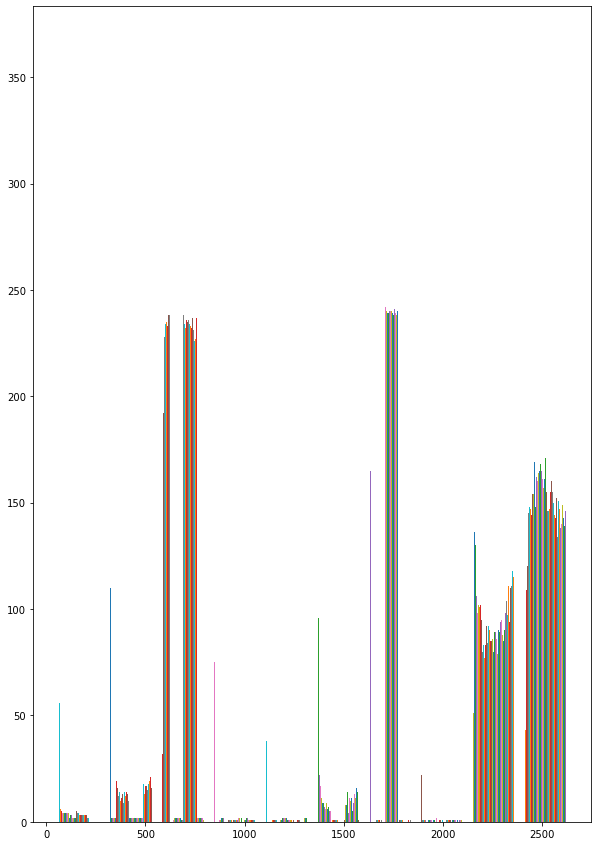

In [8]:
# histogram for only the white tile (gray scaled)
white_tile = bayer[y1:y2,x1:x2]
plt.hist(white_tile, label=f"A4")
plt.show()

Histogram after blacklevel correction


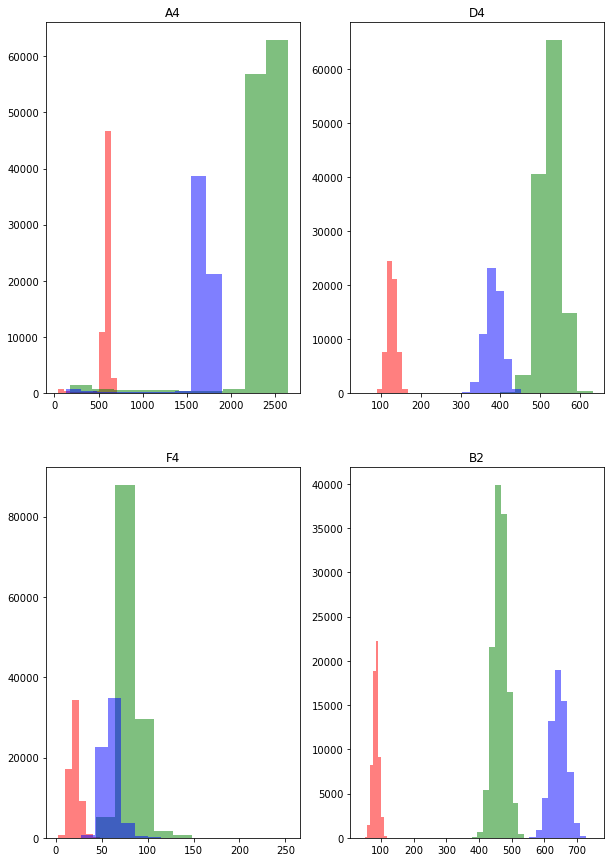

In [9]:
# plot data with subplots
print("Histogram after blacklevel correction")
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(foi):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)
        if i==0:
            ax1.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")



plt.show()

In [10]:
# check median values on our fields of interest
# blacklevel corrected
for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)

        red_median = np.median(red)
        green_median = np.median(green)
        blue_median = np.median(blue)
        print(f"{tile}: rmedian:{red_median}, gmedian:{green_median}, bmedian:{blue_median}")

A4: rmedian:598.0, gmedian:2402.0, bmedian:1698.0
D4: rmedian:129.0, gmedian:524.0, bmedian:383.0
F4: rmedian:20.0, gmedian:79.0, bmedian:59.0
B2: rmedian:84.0, gmedian:464.0, bmedian:644.0


In [11]:
# step 2: White Balance the data

# white balance
# correct the white blance based on a gray card in the raw image

def correct_bayer_wb(bayer, wb):
    # wb: [red, green, blue, green]
    for y in range(bayer.shape[0]):
        for x in range(bayer.shape[1]):
            if y%2==0:
                if x%2==0:
                    # blue
                    bayer[y][x] = bayer[y][x]*wb[2]
                else:
                    # green
                    bayer[y][x] = bayer[y][x]*wb[1]
            else:
                if x%2==0:
                    # green
                    bayer[y][x] = bayer[y][x]*wb[1]
                else:
                    # red
                    bayer[y][x] = bayer[y][x]*wb[0]
    
    return bayer

# define position of gray card D4
#[2300,2800, 2050,2550]
y1 = int(dict_cc_field["D4"][0])
y2 = int(dict_cc_field["D4"][1])
x1 = int(dict_cc_field["D4"][2])
x2 = int(dict_cc_field["D4"][3])

red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)

red_median = np.median(red)
green_median = np.median(green)
blue_median = np.median(blue)

# wb: [red, green, blue, green]
base_wb = [green_median/red_median, 1.0, green_median/blue_median, 1.0]

# multiply every pixel with the corresponding base wb value
# returns white balance coreected bayer matrix
bayer_corr = correct_bayer_wb(bayer, base_wb)


Histogram after white balance


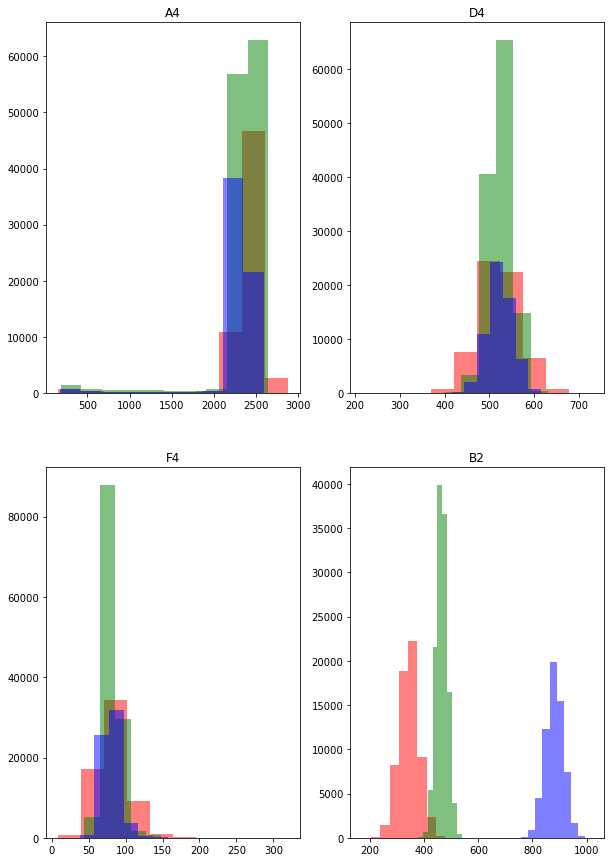

In [12]:
# plot data with subplots
print("Histogram after white balance")
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(foi):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_bayer_color(bayer_corr, y1, y2, x1, x2)
        if i==0:
            ax1.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")



plt.show()

In [13]:
print(f"White blance list: {base_wb}")

for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        # split the bayer atrix into the red green and blue components
        red, green, blue = get_bayer_color(bayer_corr, y1, y2, x1, x2)

        red_median = np.median(red)
        green_median = np.median(green)
        blue_median = np.median(blue)
        print(f"{tile}: rmedian:{red_median}, gmedian:{green_median}, bmedian:{blue_median}")

print("\n bayer white balance corrected:")
bayer_corr

White blance list: [4.062015503875969, 1.0, 1.3681462140992167, 1.0]
A4: rmedian:2429.0, gmedian:2402.0, bmedian:2323.0
D4: rmedian:524.0, gmedian:524.0, bmedian:524.0
F4: rmedian:81.0, gmedian:79.0, bmedian:80.0
B2: rmedian:341.0, gmedian:464.0, bmedian:881.0

 bayer white balance corrected:


array([[1663, 1688, 1663, ..., 1400, 1254, 1464],
       [1642, 1563, 1653, ..., 1470, 1375, 1372],
       [1618, 1713, 1637, ..., 1394, 1384, 1374],
       ...,
       [1399, 1356, 1347, ..., 1141, 1098, 1035],
       [1325, 1442, 1284, ..., 1145, 1039, 1058],
       [1386, 1344, 1305, ..., 1080, 1053, 1023]], dtype=uint16)

In [14]:
# step 3: Correct linear brightness

# correct linear brightness
# output_bps=16
# current dtype uint 16

# migth not be necessary

In [15]:
# step 4: Properly Clip image data

# no clipping needed

In [16]:
# step 5: Demosaic it

# define demosaic function
# take four bayerpixel to one RGB pixel
# R, G stay constant G is average of both green channels
# resize to x/2 and y/2 bggr => rgb
def demosaic_raw_rgb(bayer):
    # downscaling to half on image axis, one bayer quadruple to one rgb pixel
    rgb = np.zeros([bayer.shape[0]//2,bayer.shape[1]//2,3]) 
    for y in range(0,bayer.shape[0],2):
        for x in range(0,bayer.shape[1],2):
                # blue
                g = bayer[y+1][x]+bayer[y][x+1]
                y1 = y//2
                x1 = x//2
                rgb[y1][x1] = [bayer[y+1][x+1],g/2,bayer[y][x]] 
                    
    return rgb

# call demosaic function
rgb_array = demosaic_raw_rgb(bayer_corr)
print("raw RGB array")
rgb_array

raw RGB array


array([[[1563. , 1665. , 1663. ],
        [1608. , 1645. , 1663. ],
        [1653. , 1666. , 1649. ],
        ...,
        [1336. , 1391. , 1287. ],
        [1470. , 1396. , 1299. ],
        [1372. , 1419.5, 1254. ]],

       [[1718. , 1690.5, 1618. ],
        [1677. , 1717. , 1637. ],
        [1523. , 1679. , 1655. ],
        ...,
        [1360. , 1393. , 1299. ],
        [1279. , 1390.5, 1305. ],
        [1344. , 1399. , 1384. ]],

       [[1559. , 1731.5, 1572. ],
        [1734. , 1700.5, 1674. ],
        [1738. , 1683. , 1669. ],
        ...,
        [1368. , 1413.5, 1348. ],
        [1470. , 1443.5, 1336. ],
        [1368. , 1434.5, 1407. ]],

       ...,

       [[1405. , 1330. , 1313. ],
        [1320. , 1403. , 1284. ],
        [1316. , 1316. , 1264. ],
        ...,
        [1056. , 1073.5,  980. ],
        [1048. , 1129.5, 1022. ],
        [1182. , 1091. ,  975. ]],

       [[1356. , 1385. , 1374. ],
        [1413. , 1356. , 1290. ],
        [1275. , 1338.5, 1294. ],
        .

In [17]:
np.shape(rgb_array[:,:,1])

(1520, 2028)

Histogram after demosaic


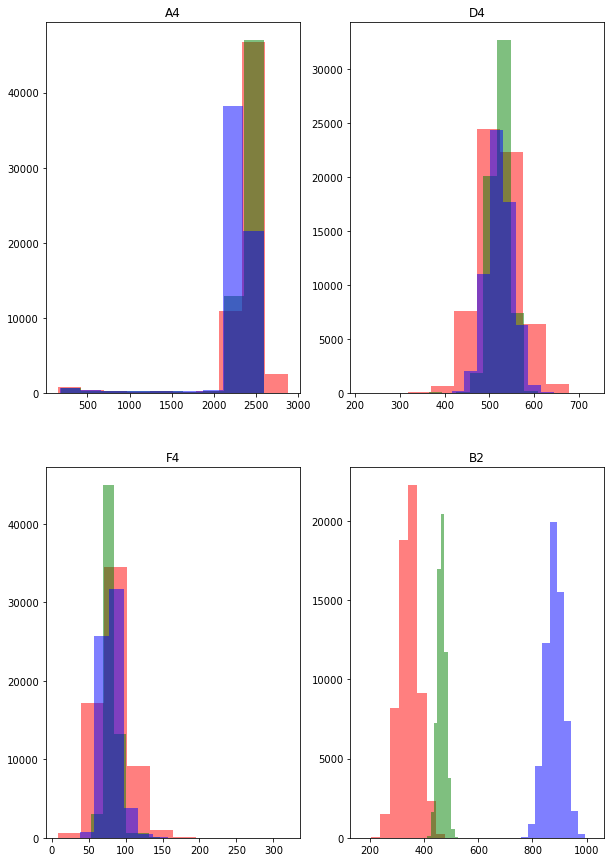

In [18]:
# plot data with subplots
print("Histogram after demosaic")
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

run = True

for i, tile in enumerate(foi):
    red = []
    green = []
    blue = []
    y1 = int(dict_cc_field[tile][0])
    y2 = int(dict_cc_field[tile][1])
    x1 = int(dict_cc_field[tile][2])
    x2 = int(dict_cc_field[tile][3])
    red = rgb_array[y1//2:y2//2,x1//2:x2//2,0].reshape(62500, 1)
    green = rgb_array[y1//2:y2//2,x1//2:x2//2,1].reshape(62500, 1)
    blue = rgb_array[y1//2:y2//2,x1//2:x2//2,2].reshape(62500, 1)
    
    #print(red, green, blue)


    if run==True:
        if i==0:
            ax1.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")



plt.show()

In [19]:
print(f"shape of the rgb-aray: {rgb_array.shape}")

shape of the rgb-aray: (1520, 2028, 3)


Image after demosaic


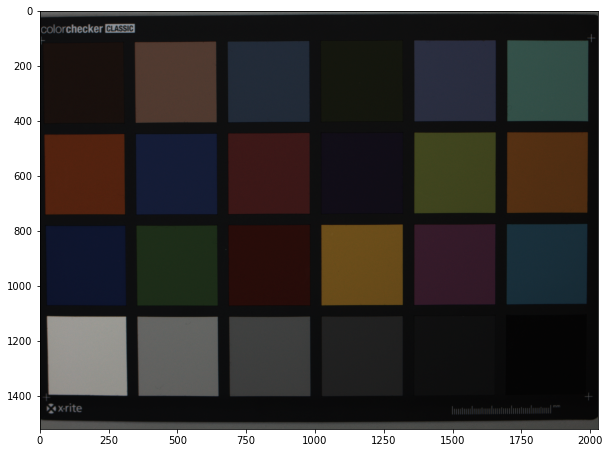

In [20]:
print("Image after demosaic")
rgb = rgb_array/2**12
im = Image.fromarray((rgb * 255).astype(np.uint8))
plt.imshow(im)

In [21]:
for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        
        # get tiles from scaled down demosaic array
        array_crop = rgb_array[y1//2:y2//2,x1//2:x2//2]

        red_median = np.median(array_crop[:,:,0])
        green_median = np.median(array_crop[:,:,1])
        blue_median = np.median(array_crop[:,:,2])
        print(f"{tile}: rmedian:{red_median}, gmedian:{green_median}, bmedian:{blue_median}")

A4: rmedian:2429.0, gmedian:2403.0, bmedian:2323.0
D4: rmedian:524.0, gmedian:524.5, bmedian:524.0
F4: rmedian:81.0, gmedian:79.5, bmedian:80.0
B2: rmedian:341.0, gmedian:464.5, bmedian:881.0


In [22]:
# color transformation raw_rgb to sRGB

# ccm based on officila documentation
cc = np.array([[1.98691, -0.84671, -0.14019],
                [-0.26581, 1.70615, -0.44035],
                [-0.09532, -0.47332, 1.56864]])

# create empty array
sRGB = np.zeros(rgb_array.shape)
#loop trough every pixel
# multiply the pixel vector with the ccm to get color transformed pixel
for y in range(rgb_array.shape[0]):
    for x in range(rgb_array.shape[1]):
        pix = rgb_array[y,x,:]
        sRGB_pix = cc.dot(pix)
        for i in range(3):
            if sRGB_pix[i] < 0.0:
                sRGB_pix[i] = 0
        sRGB[y,x,:] = sRGB_pix
        
print(f"SRGB: {sRGB.astype(int)}")

SRGB: [[[1462 1692 1671]
  [1568 1646 1676]
  [1642 1676 1640]
  ...
  [1296 1451 1233]
  [1556 1419 1236]
  [1348 1504 1164]]

 [[1755 1715 1574]
  [1648 1762 1595]
  [1372 1731 1656]
  ...
  [1340 1443 1248]
  [1180 1457 1267]
  [1291 1420 1380]]

 [[1411 1847 1497]
  [1770 1703 1655]
  [1794 1674 1655]
  ...
  [1332 1454 1315]
  [1511 1483 1272]
  [1306 1464 1397]]

 ...

 [[1481 1317 1296]
  [1254 1477 1224]
  [1323 1338 1234]
  ...
  [1051 1119  928]
  [ 982 1198  968]
  [1288 1117  900]]

 [[1328 1397 1370]
  [1478 1369 1247]
  [1218 1374 1274]
  ...
  [1282 1067 1002]
  [1178 1159  947]
  [1004 1086 1042]]

 [[1287 1471 1281]
  [1665 1329 1234]
  [1164 1450 1293]
  ...
  [1176 1151  974]
  [1065 1127 1029]
  [ 993 1071 1032]]]


In [23]:
np.count_nonzero(sRGB[:,:,2]>0) # same result for each color channel

2918058

In [24]:
np.count_nonzero(sRGB[:,:,2]<0) # same result for each color channel

0

Histogram after Color correction


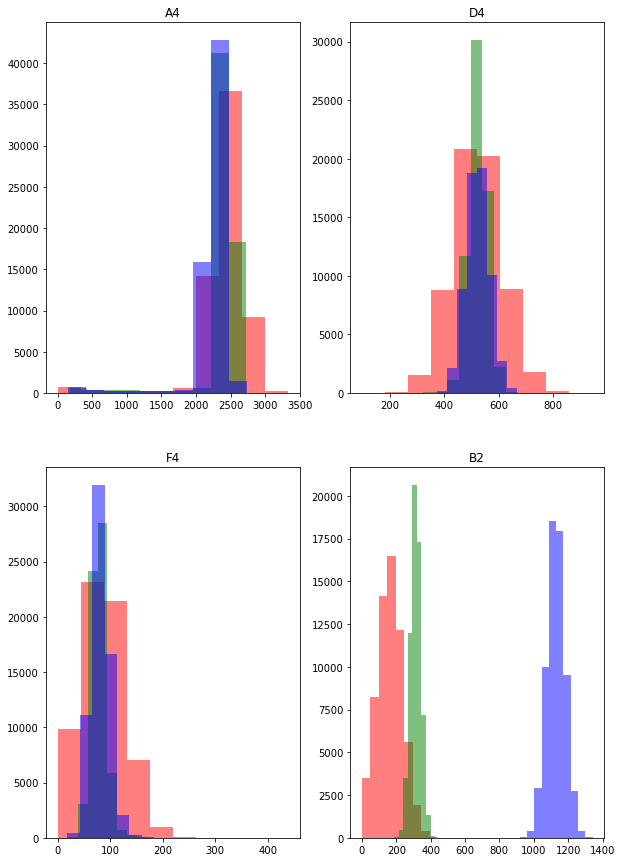

In [25]:
# plot data with subplots
print("Histogram after Color correction")
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

run = True

for i, tile in enumerate(foi):
    red = []
    green = []
    blue = []
    y1 = int(dict_cc_field[tile][0])
    y2 = int(dict_cc_field[tile][1])
    x1 = int(dict_cc_field[tile][2])
    x2 = int(dict_cc_field[tile][3])
    red = sRGB[y1//2:y2//2,x1//2:x2//2,0].reshape(62500, 1)
    green = sRGB[y1//2:y2//2,x1//2:x2//2,1].reshape(62500, 1)
    blue = sRGB[y1//2:y2//2,x1//2:x2//2,2].reshape(62500, 1)
    
    #print(red, green, blue)


    if run==True:
        if i==0:
            ax1.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")



plt.show()

In [26]:
# calculate the median values after color transfromation
for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        array_crop = sRGB[y1//2:y2//2,x1//2:x2//2]
       
        red_median = np.median(array_crop[:,:,0])
        green_median = np.median(array_crop[:,:,1])
        blue_median = np.median(array_crop[:,:,2])
        print(f"{tile}: rmedian:{red_median:.2f}, gmedian:{green_median:.2f}, bmedian:{blue_median:.2f}")

A4: rmedian:2461.93, gmedian:2428.10, bmedian:2273.09
D4: rmedian:521.04, gmedian:524.21, bmedian:523.26
F4: rmedian:85.01, gmedian:78.33, bmedian:80.56
B2: rmedian:164.25, gmedian:313.58, bmedian:1129.08


Histogram for entire image after color correction


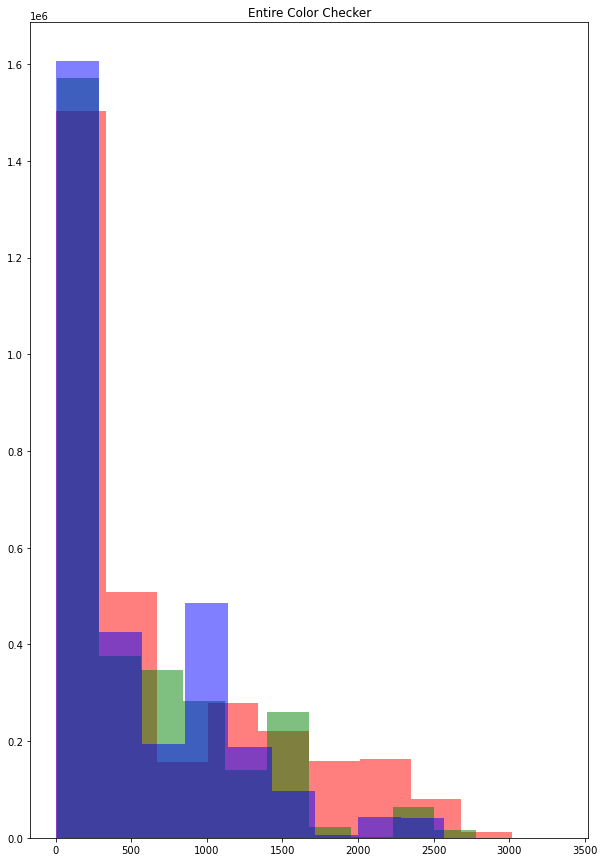

In [27]:
# plot hist for entire image
print("Histogram for entire image after color correction")
srgb_shape = sRGB.shape # pixels in each position
srgb_size = sRGB.size # number of pixels
# 9247680/3, size per color channel

red = sRGB[:,:,0].reshape(srgb_size//3, 1)
green = sRGB[:,:,1].reshape(srgb_size//3, 1)
blue = sRGB[:,:,2].reshape(srgb_size//3, 1)

plt.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
plt.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
plt.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
plt.title(f"Entire Color Checker")
plt.show()

In [28]:
# calculate the min values after color transfromation
for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        array_crop = sRGB[y1//2:y2//2,x1//2:x2//2]
       
        red_min = np.min(array_crop[:,:,0])
        green_min = np.min(array_crop[:,:,1])
        blue_min = np.min(array_crop[:,:,2])
        print(f"{tile}: rmin:{red_min:.2f}, gmin:{green_min:.2f}, bmin:{blue_min:.2f}")

A4: rmin:0.00, gmin:172.88, bmin:154.38
D4: rmin:97.06, gmin:235.07, bmin:338.46
F4: rmin:0.00, gmin:20.30, bmin:18.72
B2: rmin:0.00, gmin:187.95, bmin:918.67


In [29]:
headers = ["specification", "r_median", "g_median", "b_median"]
data = []
for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        array_crop = sRGB[y1//2:y2//2,x1//2:x2//2]
       
        red_median = np.median(array_crop[:,:,0])
        green_median = np.median(array_crop[:,:,1])
        blue_median = np.median(array_crop[:,:,2])

        data.append([f"{tile}:cc", dict_cc_colors[tile][0], dict_cc_colors[tile][1], dict_cc_colors[tile][2]])
        data.append([f"{tile}:8bit", int(red_median*2**8/2**12), int(green_median*2**8/2**12), int(blue_median*2**8/2**12)])

print("sRGB data")
print(tabulate(data, headers=headers))

sRGB data
specification      r_median    g_median    b_median
---------------  ----------  ----------  ----------
A4:cc                   243         243         242
A4:8bit                 153         151         142
D4:cc                   122         122         121
D4:8bit                  32          32          32
F4:cc                    52          52          52
F4:8bit                   5           4           5
B2:cc                    80          91         166
B2:8bit                  10          19          70


In [30]:
print("Relative values from 8bit sRGB to cc referenz value")
for i in range(0,8,2):
    rel_r = data[i+1][1]/data[i][1]
    rel_g = data[i+1][2]/data[i][2]
    rel_b = data[i+1][3]/data[i][3]
    print(f"{data[i+1][0]}: {rel_r:.2f}, {rel_g:.2f}, {rel_b:.2f}")

Relative values from 8bit sRGB to cc referenz value
A4:8bit: 0.63, 0.62, 0.59
D4:8bit: 0.26, 0.26, 0.26
F4:8bit: 0.10, 0.08, 0.10
B2:8bit: 0.12, 0.21, 0.42


In [31]:
print("Values from 8bit sRGB divided by max illumination rate")
for i in range(0,8,2):
    rel_r = data[i+1][1]/0.64
    rel_g = data[i+1][2]/0.64
    rel_b = data[i+1][3]/0.64
    print(f"{data[i+1][0]}: {rel_r:.2f}, {rel_g:.2f}, {rel_b:.2f}")

Values from 8bit sRGB divided by max illumination rate
A4:8bit: 239.06, 235.94, 221.88
D4:8bit: 50.00, 50.00, 50.00
F4:8bit: 7.81, 6.25, 7.81
B2:8bit: 15.62, 29.69, 109.38


Image after color correction


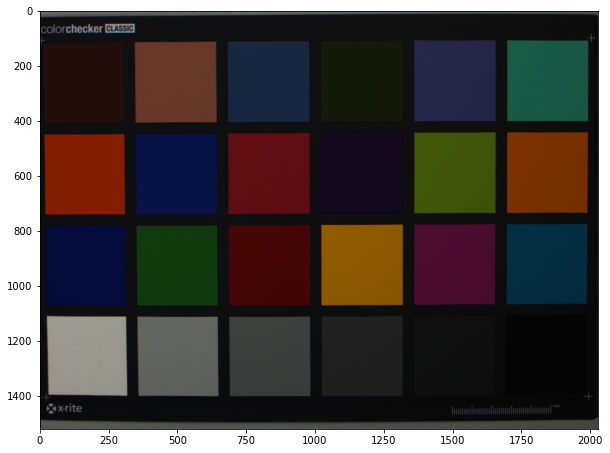

In [32]:
print("Image after color correction")
f = sRGB/2**12
im = Image.fromarray((f * 255).astype(np.uint8))
plt.imshow(im)

In [33]:
# calculate gamma correction 
# convert sRGB12 to sRGB8
RGB_8 = sRGB*2**8/2**12

# gamma conversion: 255(rgb/255)^0.45
gamma_rgb = 255*(abs(RGB_8)/255)**0.45

# floor division by 1 to get a whole number
gamma_rgb //= 1

In [34]:
headers = ["specification", "r_median", "g_median", "b_median"]
data = []
for tile in foi:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        array_crop = gamma_rgb[y1//2:y2//2,x1//2:x2//2]
       
        red_median = np.median(array_crop[:,:,0])
        green_median = np.median(array_crop[:,:,1])
        blue_median = np.median(array_crop[:,:,2])

        data.append([f"{tile}:cc", dict_cc_colors[tile][0], dict_cc_colors[tile][1], dict_cc_colors[tile][2]])
        data.append([f"{tile}:8bit", int(red_median), int(green_median), int(blue_median)])

print("Gamma corrected 8bit RGB data")
print(tabulate(data, headers=headers))

Gamma corrected 8bit RGB data
specification      r_median    g_median    b_median
---------------  ----------  ----------  ----------
A4:cc                   243         243         242
A4:8bit                 203         201         195
D4:cc                   122         122         121
D4:8bit                 101         101         101
F4:cc                    52          52          52
F4:8bit                  44          43          43
B2:cc                    80          91         166
B2:8bit                  60          80         143


In [35]:
print("Relative values from 8bit gamma corrected to cc referenz value")
for i in range(0,8,2):
    rel_r = data[i+1][1]/data[i][1]
    rel_g = data[i+1][2]/data[i][2]
    rel_b = data[i+1][3]/data[i][3]
    print(f"{data[i+1][0]}: {rel_r:.2f}, {rel_g:.2f}, {rel_b:.2f}")

Relative values from 8bit gamma corrected to cc referenz value
A4:8bit: 0.84, 0.83, 0.81
D4:8bit: 0.83, 0.83, 0.83
F4:8bit: 0.85, 0.83, 0.83
B2:8bit: 0.75, 0.88, 0.86


Image after gamma correction


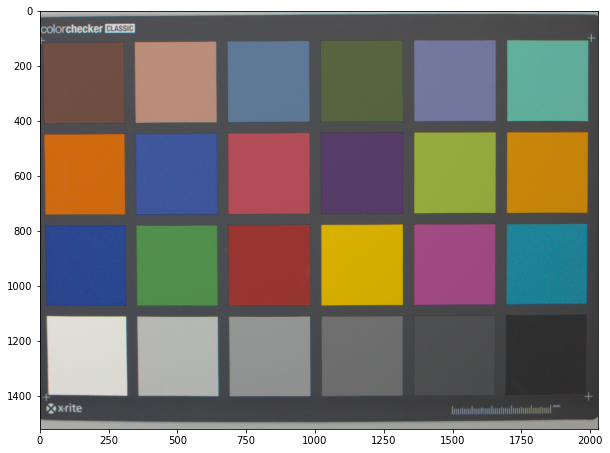

In [36]:
# make image data presentable in matplotlib
x = (gamma_rgb-np.min(gamma_rgb))/(np.max(gamma_rgb)-np.min(gamma_rgb))
# show iamge in matplotlib
print("Image after gamma correction")
im = Image.fromarray((x * 255).astype(np.uint8))
plt.imshow(im)

Histogram after gamma correction


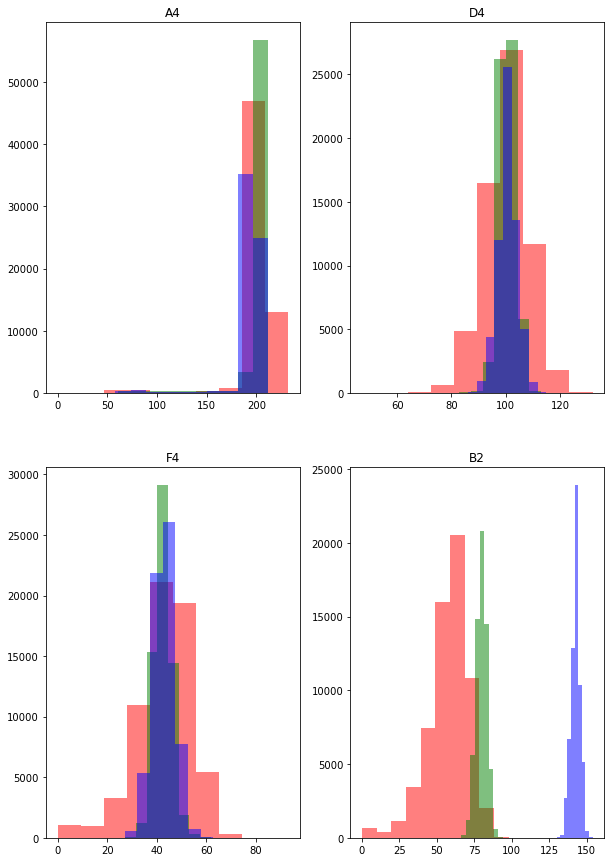

In [37]:
# plot data with subplots
print("Histogram after gamma correction")
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

run = True

for i, tile in enumerate(foi):
    red = []
    green = []
    blue = []
    y1 = int(dict_cc_field[tile][0])
    y2 = int(dict_cc_field[tile][1])
    x1 = int(dict_cc_field[tile][2])
    x2 = int(dict_cc_field[tile][3])
    red = gamma_rgb[y1//2:y2//2,x1//2:x2//2,0].reshape(62500, 1)
    green = gamma_rgb[y1//2:y2//2,x1//2:x2//2,1].reshape(62500, 1)
    blue = gamma_rgb[y1//2:y2//2,x1//2:x2//2,2].reshape(62500, 1)
    
    #print(red, green, blue)


    if run==True:
        if i==0:
            ax1.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(red ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(green ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(blue ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")



plt.show()

In [38]:
# check SRGB (gamma corrected) values for every field
headers = ["specification", "r_median", "g_median", "b_median"]
data = []
for tiles in array_cc_colors:
    for tile in tiles:
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])

        array_crop = gamma_rgb[y1//2:y2//2,x1//2:x2//2]
       
        red_median = np.median(array_crop[:,:,0])
        green_median = np.median(array_crop[:,:,1])
        blue_median = np.median(array_crop[:,:,2])

        data.append([f"{tile}:cc", dict_cc_colors[tile][0], dict_cc_colors[tile][1], dict_cc_colors[tile][2]])
        data.append([f"{tile}:8bit", int(red_median), int(green_median), int(blue_median)])

print("Gamma corrected 8bit RGB data")
print(tabulate(data, headers=headers))

Gamma corrected 8bit RGB data
specification      r_median    g_median    b_median
---------------  ----------  ----------  ----------
A1:cc                   115          82          68
A1:8bit                 103          72          62
B1:cc                   194         150         130
B1:8bit                 170         130         112
C1:cc                    98         122         157
C1:8bit                  88         111         137
D1:cc                    87         108          67
D1:8bit                  81          92          59
E1:cc                   133         128         177
E1:8bit                 106         109         146
F1:cc                   103         189         170
F1:8bit                  90         159         142
A2:cc                   214         126          44
A2:8bit                 190          98          15
B2:cc                    80          91         166
B2:8bit                  60          80         143
C2:cc                   193       

In [39]:
print("Relative values from 8bit gamma corrected to cc referenz value")
for i in range(0,48,2):
    rel_r = data[i+1][1]/data[i][1]
    rel_g = data[i+1][2]/data[i][2]
    rel_b = data[i+1][3]/data[i][3]
    print(f"{data[i+1][0]}: {rel_r:.2f}, {rel_g:.2f}, {rel_b:.2f}")

Relative values from 8bit gamma corrected to cc referenz value
A1:8bit: 0.90, 0.88, 0.91
B1:8bit: 0.88, 0.87, 0.86
C1:8bit: 0.90, 0.91, 0.87
D1:8bit: 0.93, 0.85, 0.88
E1:8bit: 0.80, 0.85, 0.82
F1:8bit: 0.87, 0.84, 0.84
A2:8bit: 0.89, 0.78, 0.34
B2:8bit: 0.75, 0.88, 0.86
C2:8bit: 0.84, 0.79, 0.82
D2:8bit: 0.85, 0.95, 0.88
E2:8bit: 0.87, 0.83, 0.91
F2:8bit: 0.81, 0.97, 0.00
A3:8bit: 0.77, 1.08, 0.89
B3:8bit: 1.07, 0.89, 0.97
C3:8bit: 0.80, 0.91, 0.75
D3:8bit: 0.85, 0.80, 0.00
E3:8bit: 0.79, 0.79, 0.79
F3:8bit: 3.88, 0.89, 0.86
A4:8bit: 0.84, 0.83, 0.81
B4:8bit: 0.82, 0.83, 0.81
C4:8bit: 0.84, 0.85, 0.84
D4:8bit: 0.83, 0.83, 0.83
E4:8bit: 0.84, 0.84, 0.85
F4:8bit: 0.85, 0.83, 0.83
